In [40]:
import math
import cmath
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [41]:
# Initialize engineering formatter
engf = EngFormatter(places=2)

In [42]:
# Functions to help series/parallel calculations
def recipsumrecip(data):
    # Returns the reciprocal of the sum of the reciprocals
    denom = 0
    for n in data:
        denom += 1/n
    return 1/denom

def recip(num):
    return 1/num

parallel = recipsumrecip
series = sum

In [43]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [44]:
def cramers_rule(A,b):
    # display(A)
    det_A = A.det()
    # print(f"detA= {det_A}\n")

    if det_A == 0:
        raise ValueError("The $\det(A)$ is zero; the system has no unique solution.")
    
    solutions = []

    for i in range(A.cols):
        # print(f'I={i}')
        
        A_i = A.copy()
        A_i[:, i] = b
        # display(A_i)
        
        det_Ai = A_i.det()
        # print(f"det{i}= {det_Ai}")
        
        sol = det_Ai/det_A
        solutions.append(sol.evalf())
        print(f"sol{i}= {sol}")

    return solutions



# Exam

### 2

2.	For the circuit shown below, using the Node Voltage Analysis method, determine the current in R1.         [5 Points]
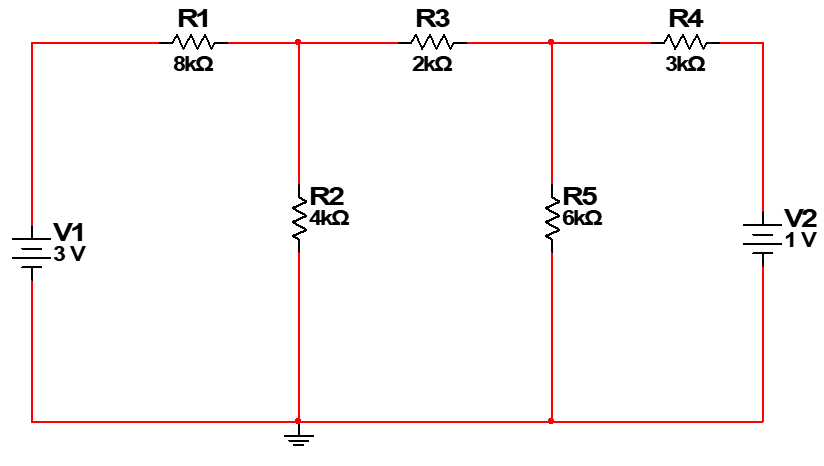

Set up Equations

In [45]:
va, vb = sp.symbols('V_A, V_B')

In [46]:
# Node A
na = (va-3)/8e3 + va/4e3 + (va-vb)/2e3
na

0.000875*V_A - 0.0005*V_B - 0.000375

In [47]:
# Node B
nb = (vb-va)/2e3 + vb/6e3 + (vb-1)/3e3
nb

-0.0005*V_A + 0.001*V_B - 0.000333333333333333

Build matrices

In [48]:
exprs = [na,nb]
vars = [va,vb]
A= sp.Matrix([
    [expr.coeff(var) for var in vars] for expr in exprs

])
A

Matrix([
[0.000875, -0.0005],
[ -0.0005,   0.001]])

In [49]:
substitutions = dict(zip(vars, [0 for var in vars]))
b = sp.Matrix(
    [-expr.subs(substitutions) for expr in exprs]
)
b

Matrix([
[            0.000375],
[0.000333333333333333]])

Apply cramer's rule

In [50]:
sol = cramers_rule(A,b)
sol

sol0= 0.866666666666667
sol1= 0.766666666666667


[0.866666666666667, 0.766666666666667]

Apply Ohm's Law

In [56]:
ir1 = (sol[0]-3)/(8*si.k)
engf(ir1)


'−266.67 µ'

### 3

3.	For the circuit shown below, using Mesh Current Analysis method, determine the current in R3. [10 Points]
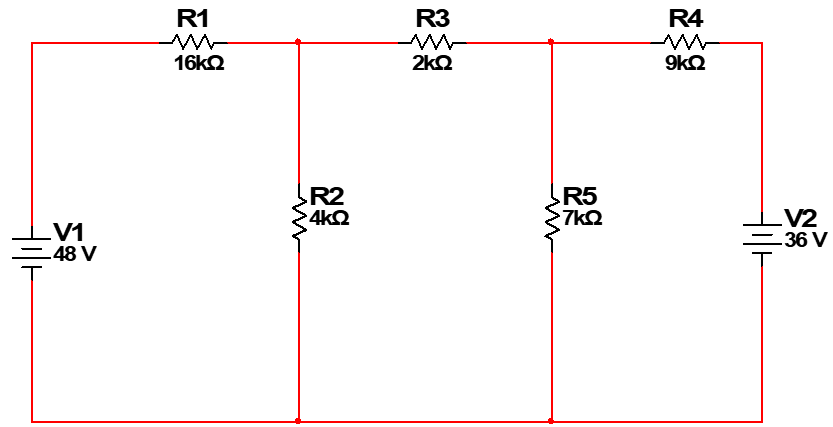

In [66]:
# Define Vars
i1, i2, i3 = sp.symbols('I_1, I_2, I_3')
r1 = 16*si.k
r2 = 4*si.k
r3 = 2*si.k
r4 = 9*si.k
r5 = 7*si.k

Set up equations for each loop.  Loops will be numbered sequentially from left to right and all are assumed clockwise current.

In [59]:
loop1 = 48 - i1*r1 - r2*(i1-i2)
loop1

-20000*I_1 + 4000*I_2 + 48

In [60]:
loop2 = -r2*(i2-i1) - r3*i2 - r5*(i2-i3)
loop2

4000*I_1 - 13000*I_2 + 7000*I_3

In [61]:
loop3 = -r5*(i3-i2) - r4*(i3) - 36
loop3

7000*I_2 - 16000*I_3 - 36

Build matrices

In [62]:
exprs = [loop1,loop2,loop3]
vars = [i1, i2, i3]
A= sp.Matrix([
    [expr.coeff(var) for var in vars] for expr in exprs

])
A

Matrix([
[-20000,   4000,      0],
[  4000, -13000,   7000],
[     0,   7000, -16000]])

In [63]:
substitutions = dict(zip(vars, [0 for var in vars]))
b = sp.Matrix(
    [-expr.subs(substitutions) for expr in exprs]
)
b

Matrix([
[-48],
[  0],
[ 36]])

Apply cramer's rule

In [64]:
sol = cramers_rule(A,b)
sol

sol0= 207/91375
sol1= -123/182750
sol2= -93/36550


[0.00226538987688098, -0.000673050615595075, -0.00254445964432285]

$I_{R3}$ is same as $I_2$

In [65]:
ir3 = sol[1]
engf(ir3)

'−673.05 µ'

### 4

4.	For the circuit shown below, determine the Thevenin equivalent circuit as seen by the load resistance R6 between points A & B. [5 Points]
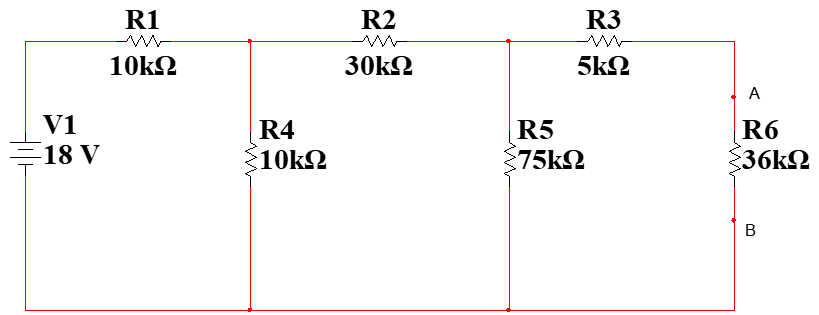

Load-perspective resistance

In [70]:
lpr = 5 + parallel([30,75]) + parallel([10,10])
lpr = lpr*si.k
engf(lpr)

'31.43 k'

Open-load voltage

In [69]:
lhs = 10 + parallel([10,30])
olv = 75/(lhs+75)*18
olv

14.594594594594595

Theveninin Equivalent

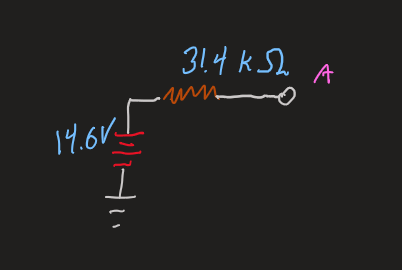

### 5

5.	For the circuit shown below, using a suitable analysis method, determine the current in R2. [5 Points]
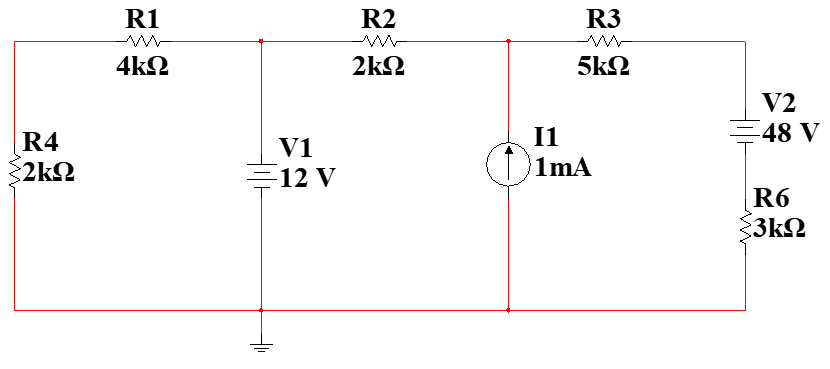

#### Using Source Conversion

We can start by collapsing resistances that are in series into single resistances:
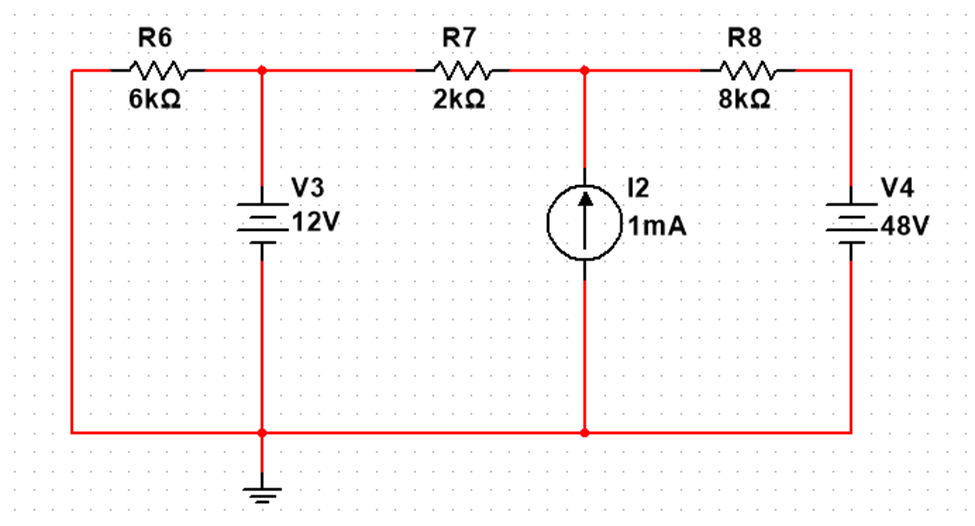

Next, we can convert the 48V source into a current source:  

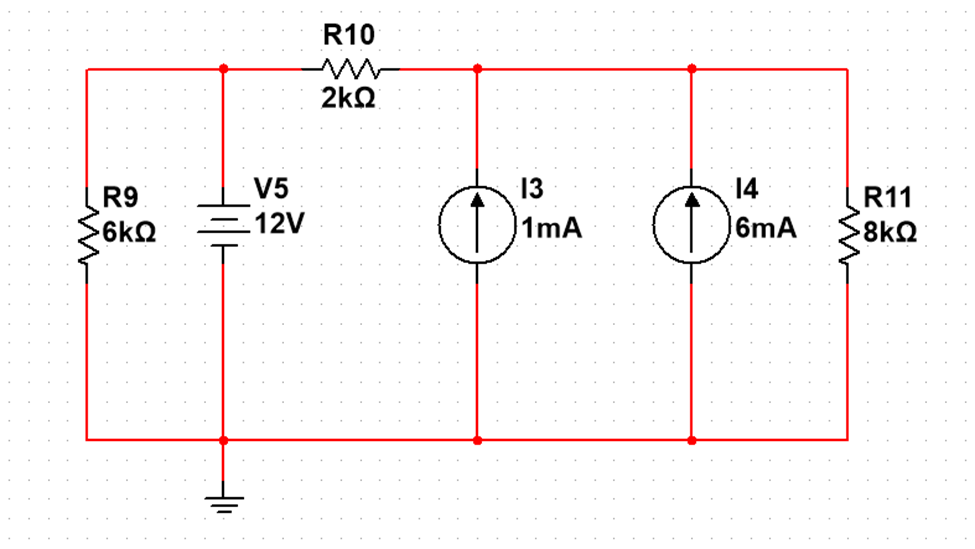
$$
\frac{48V}{8kΩ} = 6mA
$$

The two current sources can be simplified by summing them together:

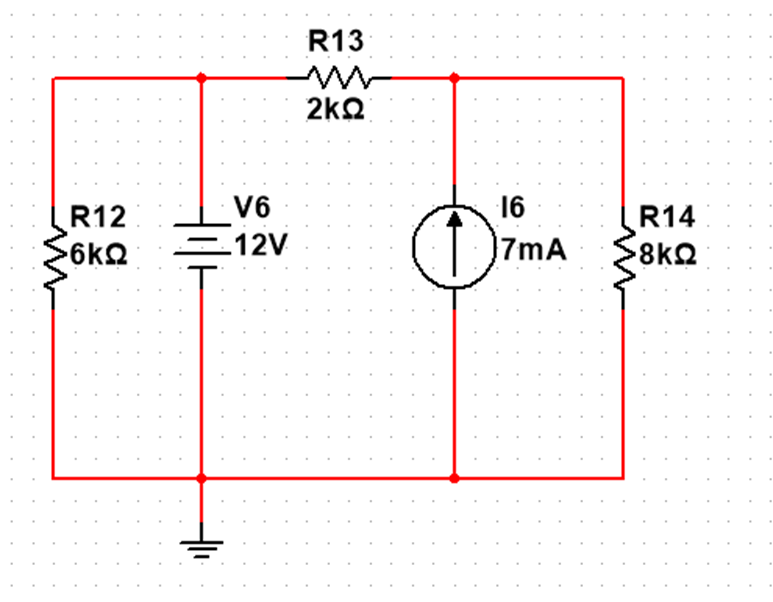

And we can convert the current source back into a voltage source:

$$7mA*8kΩ=56 V$$

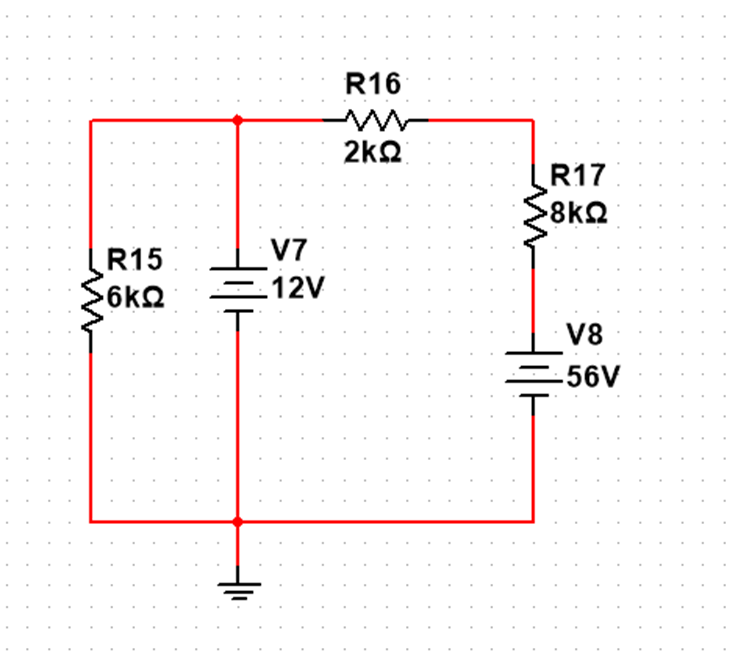


Again, series resistances can be simplified:

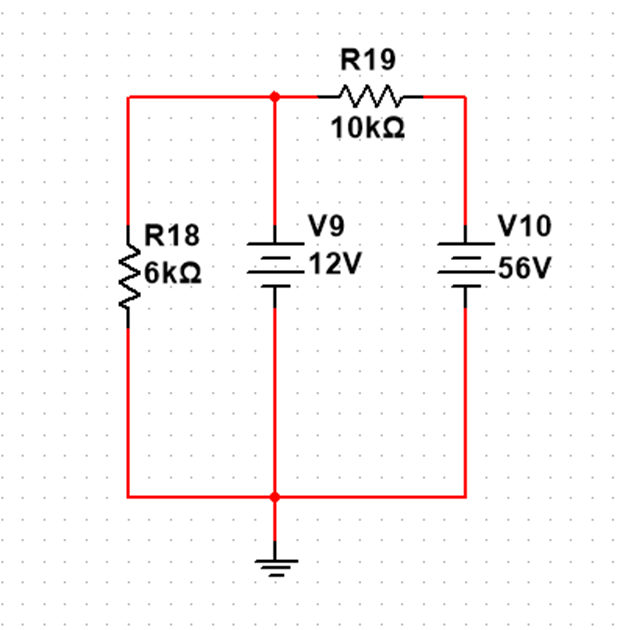

Now we can solve for the current through the $10 kΩ$ resistor:

In [71]:
(56-12)/10e3

0.0044

### 6

6.	For the circuit shown below, using a suitable analysis method, determine the current in the 4 kΩ resistor.    [5 Points]  

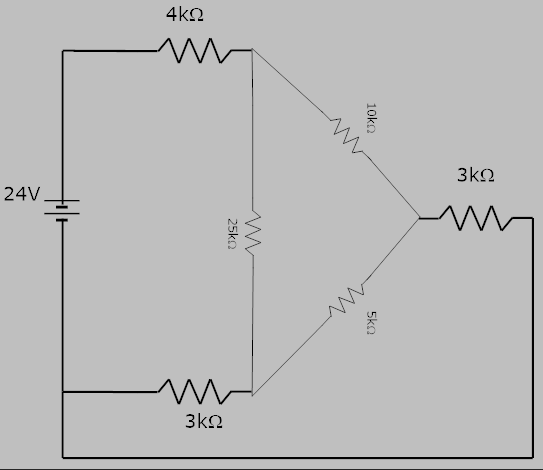

#### Mesh-current Analysis

We'll start by naming our loops and resistors  
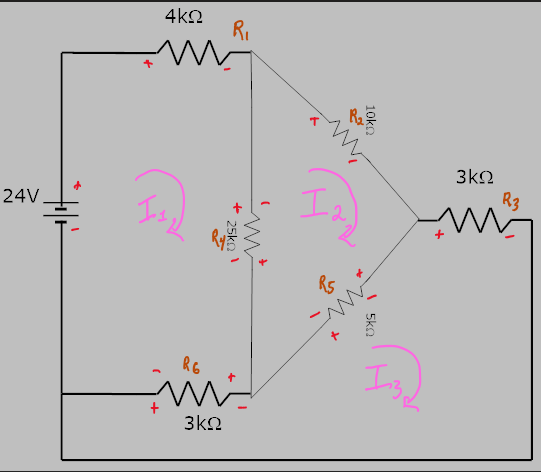

In [73]:
# Define Vars
i1, i2, i3 = sp.symbols('I_1, I_2, I_3')
r1 = 4*si.k
r2 = 10*si.k
r3 = 3*si.k
r4 = 25*si.k
r5 = 5*si.k
r6 = 3*si.k

Then we can define our KVL loop expressions using SymPy

In [74]:
loop1 = 24 - r1*i1 - r4*(i1-i2) - r6*(i1-i3)
loop1

-32000*I_1 + 25000*I_2 + 3000*I_3 + 24

In [75]:
loop2 = -r4*(i2-i1) - r2*(i2) - r5*(i2-i3)
loop2

25000*I_1 - 40000*I_2 + 5000*I_3

In [76]:
loop3 = -r6*(i3-i1) - r5*(i3-i2) - r3*(i3)
loop3

3000*I_1 + 5000*I_2 - 11000*I_3

This allows us to easily define a matrix system of equations in the form of
$Ax=b$

In [77]:
exprs = [loop1,loop2,loop3]
vars = [i1, i2, i3]
A= sp.Matrix([
    [expr.coeff(var) for var in vars] for expr in exprs

])
A

Matrix([
[-32000,  25000,   3000],
[ 25000, -40000,   5000],
[  3000,   5000, -11000]])

In [78]:
substitutions = dict(zip(vars, [0 for var in vars]))
b = sp.Matrix(
    [-expr.subs(substitutions) for expr in exprs]
)
b

Matrix([
[-24],
[  0],
[  0]])

And using a prebuilt function, apply Cramer's Rule

In [79]:
sol = cramers_rule(A,b)
sol

sol0= 83/44125
sol1= 58/44125
sol2= 49/44125


[0.00188101983002833, 0.00131444759206799, 0.00111048158640227]

Since the $4 kΩ$ resistor is only in loop 1, its current will be equal to loop 1's current.

In [80]:
engf(sol[0])

'1.88 m'

### 7

7.	For the circuit shown below, find the current in the 820Ω resistor using superposition theorem. [9 Points]

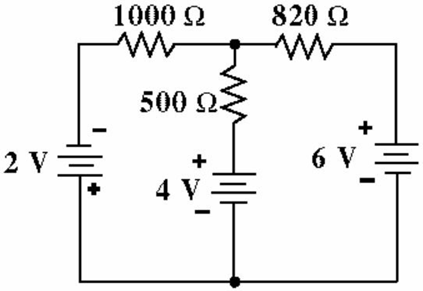

Using voltage divider and Ohm's law for each source:

In [85]:
r = parallel([820,500])
# Voltage drop across R
v1 = 2*( r / (r+1000))
# Current
i1 = v1/820
i1

0.0005780346820809248

In [86]:
r = parallel([820,1000])
v2 = 4*( r/(r+500))
i2 = v2/820
i2

0.002312138728323699

In [88]:
r = parallel([1000,500])
v3 = 6*(820/(820+r))
i3 = v3/820
i3

0.005202312138728324

In [90]:
# The last current is opposing first two.. so:
i_total = i1 + i2 - i3
engf(i_total)

'−2.31 m'

### 8

8.	For the circuit shown below, an ammeter connected across the output of the black box reads .04A while a voltmeter connected across the same two points reads 6V. Determine the equivalent Thevenin resistance and voltage as seen between those points. [4 Points]

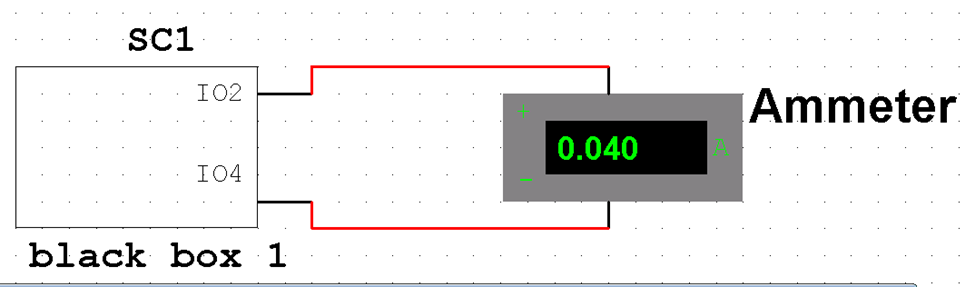
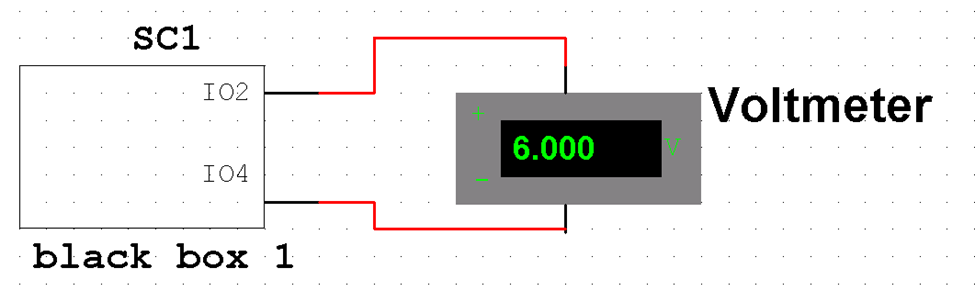

This appears to be as easy os Ohm's Law

In [91]:
6/.04

150.0

In [94]:
24**2/10

57.6